In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from bandit import BanditSigmoid, BanditLinear
from population_simulation import (
    imitaton_of_success,
    weighted_voter_rule,
    run_parallel_simulation_wvr,
)
from analytical_solutions import replicator_dynamic

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

plt.rcParams["text.latex.preamble"] = r"\usepackage{lmodern} \usepackage{amsmath}"
# Options
params = {
    "text.usetex": True,
    "font.size": 11,
    "font.family": "lmodern",
    #   'text.latex.unicode': True,
}
plt.rcParams.update(params)

colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b"]

# Supp old population plots


In [ ]:
population_sizes = [10, 1000]
steps = 100
seeds = 100


for name in ["evenly spaced", "near zero", "near one"]:
    for population_size in population_sizes:
        bandit = Bandit(name=name)
        mean_rewards_vr, optimal_action_vr = imitaton_of_success(
            steps, population_size, seeds, bandit
        )
        mean_rewards_wvr, optimal_action_wvr = weighted_voter_rule(
            steps, population_size, seeds, bandit
        )
        mean_rewards_trd, optimal_action_trd = replicator_dynamic(
            1, bandit, steps, trd=True
        )
        mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
            1, bandit, steps, trd=False
        )

        # plot stuff
        plt.rcParams["figure.figsize"] = [7, 2.5]
        fig = plt.figure(constrained_layout=True)
        gs = fig.add_gridspec(2, 3)
        ax0 = fig.add_subplot(gs[:, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[:, 2])
        fontsize = 10
        plt.rcParams.update({"font.size": fontsize})
        ax2.sharex(ax1)
        ax3.sharex(ax1)

        # axs[2].sharex(axs[3])

        colors = ["#1f77b4", "#ff7f0e", "#ff4b33", "#00008b"]
        lines_labels = []

        max_vr = max(mean_rewards_vr.mean(axis=0) + mean_rewards_vr.std(axis=0))
        max_wvr = max(mean_rewards_wvr.mean(axis=0) + mean_rewards_wvr.std(axis=0))
        max_reward = max_vr if max_vr > max_wvr else max_wvr
        min_vr = min(mean_rewards_vr.mean(axis=0) - mean_rewards_vr.std(axis=0))
        min_wvr = min(mean_rewards_wvr.mean(axis=0) - mean_rewards_wvr.std(axis=0))
        min_reward = min_vr if min_vr < min_wvr else min_wvr

        reward_steps = (max_reward - min_reward) / 6 + 0.1 / 6
        reward_ticks = [min_reward - 0.05 + i * reward_steps for i in range(7)]

        step_x = steps / 5

        ax0.plot(
            range(steps),
            mean_rewards_trd,
            label="TRD",
            color=colors[3],
            linestyle="dotted",
            linewidth=2,
            alpha=0.5,
        )
        ax0.plot(
            range(steps),
            mean_rewards_mrd,
            label="MRD",
            color=colors[2],
            linestyle="dotted",
            linewidth=2,
            alpha=0.5,
        )
        ax0.set_ylim(reward_ticks[0], reward_ticks[-1])
        ax0.set_yticks(reward_ticks)
        ax0.set_yticklabels([f"{i:.2f}" for i in reward_ticks], fontsize=fontsize)
        ax0.set_xticks([i for i in np.arange(0, steps + step_x, step_x)])
        ax0.set_ylabel("Payoff/quality", fontsize=fontsize)

        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, steps + step_x, step_x)],
            fontsize=fontsize,
        )
        ax0.set_xlabel("Time", fontsize=fontsize)

        # show only three points in the y axis
        small_ticks = [reward_ticks[0], reward_ticks[int(7 / 2)], reward_ticks[-1]]
        ax1.set_ylim(reward_ticks[0], reward_ticks[-1])
        ax2.set_ylim(reward_ticks[0], reward_ticks[-1])
        ax1.set_yticks(small_ticks)
        ax1.set_yticklabels([f"{i:.2f}" for i in small_ticks], fontsize=8)
        ax2.set_yticks(small_ticks)
        ax2.set_yticklabels([f"{i:.2f}" for i in small_ticks], fontsize=8)

        ax1.tick_params(labelbottom=False)
        ax2.set_xticks([i for i in np.arange(0, steps + step_x, step_x)])
        ax2.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, steps + step_x, step_x)],
            fontsize=fontsize,
        )
        ax2.set_xlabel("Steps", fontsize=fontsize)

        ax1.plot(
            range(steps),
            mean_rewards_vr.mean(axis=0),
            label=r"$R_{\text{success}}$",
            color=colors[0],
            alpha=0.5,
            linewidth=4,
        )
        ax1.plot(
            range(steps),
            mean_rewards_trd,
            label="TRD",
            color=colors[3],
            linestyle="dotted",
            linewidth=2,
            alpha=0.5,
        )
        ax1.fill_between(
            range(steps),
            mean_rewards_vr.mean(axis=0) - mean_rewards_vr.std(axis=0),
            mean_rewards_vr.mean(axis=0) + mean_rewards_vr.std(axis=0),
            facecolor=colors[0],
            alpha=0.2,
        )
        ax2.plot(
            range(steps),
            mean_rewards_wvr.mean(axis=0),
            label=r"$R_{\text{wvoter}}$",
            color=colors[1],
            alpha=0.5,
            linewidth=4,
        )
        ax2.plot(
            range(steps),
            mean_rewards_mrd,
            label="MRD",
            color=colors[2],
            linestyle="dotted",
            linewidth=2,
            alpha=0.5,
        )
        ax2.fill_between(
            range(steps),
            mean_rewards_wvr.mean(axis=0) - mean_rewards_wvr.std(axis=0),
            mean_rewards_wvr.mean(axis=0) + mean_rewards_wvr.std(axis=0),
            facecolor=colors[1],
            alpha=0.2,
        )

        ax3.plot(
            range(steps),
            optimal_action_vr.mean(axis=0) * 100,
            label=r"$R_{\text{success}}$",
            color=colors[0],
            alpha=0.7,
        )
        ax3.plot(
            range(steps),
            optimal_action_trd * 100,
            label="TRD",
            color=colors[3],
            linestyle="dotted",
            linewidth=2,
            alpha=0.5,
        )
        ax3.plot(
            range(steps),
            optimal_action_mrd * 100,
            label="MRD",
            color=colors[2],
            linestyle="dotted",
            linewidth=2,
            alpha=0.5,
        )

        ax3.plot(
            range(steps),
            optimal_action_wvr.mean(axis=0) * 100,
            label=r"$R_{\text{wvoter}}$",
            color=colors[1],
            alpha=0.7,
        )
        ax3.yaxis.tick_right()
        ax3.yaxis.set_label_position("right")
        ax3.set_yticks([i for i in np.arange(20, 120, 20)])
        ax3.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=fontsize)
        ax3.set_ylabel(r"$\%$ Optimal type", fontsize=fontsize, rotation=270)
        ax3.set_xlabel("Steps", fontsize=fontsize)

        if population_size == 10:
            population_size_name = "Small"
        else:
            population_size_name = "Large"

        if name == "evenly spaced":
            title_name = "Spread"
            title = (
                r"$q^{\pi}_a$'s: "
                + str(title_name)
                + r", $\mathcal{P}$: "
                + str(population_size_name)
            )

        elif name == "near zero":
            title_name = "Low"
            title = (
                r"$q^{\pi}_a$'s: "
                + str(title_name)
                + r", $\mathcal{P}$: "
                + str(population_size_name)
            )

        else:
            title_name = "High"
            title = (
                r"$q^{\pi}_a$'s: "
                + str(title_name)
                + r", $\mathcal{P}$: "
                + str(population_size_name)
            )

        # set common x-axis label
        if (population_size_name == "Large") and (
            title_name == "High" or title_name == "Spread"
        ):
            # fig.text(0.5, -0.02, 'Runs', ha='center', va='center', fontsize=fontsize)
            fig.legend(
                lines,
                labels,
                loc="upper center",
                bbox_to_anchor=(0.5, -0.04),
                ncol=4,
                fontsize=fontsize,
            )

        # set legend outside the plot
        lines_labels = [ax0.get_legend_handles_labels()]
        lines_labels.append(ax3.get_legend_handles_labels())
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

        fig.suptitle(title, fontsize=12)
        plt.savefig(
            f"population_experiments_scenario_{title_name}_prallel_{population_size_name}.pdf",
            bbox_inches="tight",
            dpi=900,
        )


# Refactor new population plots

In [ ]:
population_sizes = [1000, 10]
seeds = 1000
fontsize = 10

names = ["near zero", "evenly spaced", "near one"]
names_dict = {
    names[0]: "Low",
    names[1]: "Middle",
    names[2]: "High",
}
population_dict = {
    population_sizes[0]: "Small",
    population_sizes[1]: "Large",
}
steps_dict = {names[0]: 150, names[1]: 150, names[2]: 150}


# plot stuff
plt.rcParams.update({"font.size": fontsize})
colors = ["#1f77b4", "#00008b", "#ff7f0e", "#ff4b33"]

fig = plt.figure(figsize=(7, 2.5))  # or use tight_layout() later
outer = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)
fig.text(
    0.06,
    0.5,
    r"$\%$ Optimal action",
    horizontalalignment="center",
    verticalalignment="center",
    rotation="vertical",
    fontsize=fontsize,
)
fig.text(
    0.92,
    0.73,
    r"$\mathcal{P}$: " + f"{population_sizes[0]}",
    horizontalalignment="center",
    verticalalignment="center",
    rotation=270,
    fontsize=fontsize,
)
fig.text(
    0.92,
    0.28,
    r"$\mathcal{P}$: " + f"{population_sizes[1]}",
    horizontalalignment="center",
    verticalalignment="center",
    rotation=270,
    fontsize=fontsize,
)
fig.text(
    0.5,
    -0.02,
    "Steps",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)


axs = []
for i, name in enumerate(names):
    inner = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer[i], height_ratios=[1, 1], hspace=0.3
    )
    step = steps_dict[name]
    steps_increment = int(step / 5)
    if i == 0:
        ax0 = fig.add_subplot(inner[0])
        ax1 = fig.add_subplot(inner[1], sharey=ax0, sharex=ax0)

        ax0.set_yticks(np.arange(20, 120, 20))
        ax0.set_yticklabels([f"{i:.0f}" for i in np.arange(20, 120, 20)])
        ax0.set_ylim(5, 110)

        ax0.set_xticks(np.arange(0, step + steps_increment, steps_increment))
        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, step + steps_increment, steps_increment)]
        )
        ax0.tick_params(labelbottom=False)

    else:
        ax0 = fig.add_subplot(inner[0], sharey=axs[0])
        ax1 = fig.add_subplot(inner[1], sharex=ax0, sharey=axs[0])
        ax0.set_xticks(np.arange(0, step + steps_increment, steps_increment))
        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, step + steps_increment, steps_increment)]
        )
        ax0.tick_params(labelleft=False, labelbottom=False)
        ax1.tick_params(labelleft=False)

    ax0.set_title(r"$q^{{\pi}}_a$'s: " + f"{names_dict[names[i]]}", fontsize=fontsize)

    axs.append(ax0)
    axs.append(ax1)

for i, ax in enumerate(axs):

    if i % 2 == 0:
        j = 0
        name = names[int(i / 2)]
        bandit = BanditLinear(name=name)
        population_size = population_sizes[0]
    else:
        j = 1
        population_size = population_sizes[1]

    step = steps_dict[name]

    mean_rewards_trd, optimal_action_trd = replicator_dynamic(
        delta=1, bandit=bandit, steps=step, trd=True
    )

    mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
        delta=1, bandit=bandit, steps=step, trd=False
    )

    mean_rewards_is, optimal_action_is = imitaton_of_success(
        steps=step, population_size=population_size, seeds=seeds, bandit=bandit
    )

    mean_rewards_wvr, optimal_action_wvr = weighted_voter_rule(
        steps=step, population_size=population_size, seeds=seeds, bandit=bandit
    )

    ax.plot(
        range(step),
        optimal_action_trd * 100,
        label=r"TRD",
        color=colors[0],
        linestyle="dotted",
        linewidth=2,
        alpha=0.7,
    )
    ax.plot(
        range(step),
        optimal_action_mrd * 100,
        label=r"MRD",
        color=colors[2],
        linestyle="dotted",
        linewidth=2,
        alpha=0.7,
    )

    ax.plot(
        range(step),
        optimal_action_wvr.mean(axis=0) * 100,
        label=r"$R_{\text{wvoter}}$",
        color=colors[2],
        linewidth=1,
        alpha=0.6,
    )

    ax.fill_between(
        range(step),
        optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
        optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
        facecolor=colors[2],
        alpha=0.2,
    )

    ax.plot(
        range(step),
        optimal_action_is.mean(axis=0) * 100,
        label=r"$R_{\text{success}}$",
        color=colors[0],
        linewidth=1,
        alpha=0.6,
    )

    ax.fill_between(
        range(step),
        optimal_action_is.mean(axis=0) * 100 - optimal_action_is.std(axis=0) * 100,
        optimal_action_is.mean(axis=0) * 100 + optimal_action_is.std(axis=0) * 100,
        facecolor=colors[0],
        alpha=0.2,
    )


lines_labels = [axs[0].get_legend_handles_labels(), axs[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))

fig.legend(
    unique.values(),
    unique.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.04),
    ncol=4,
    fontsize=fontsize,
)


plt.savefig(f"population_experiments.pdf", bbox_inches="tight", dpi=900)

# Neighbourhood size plots for wvr

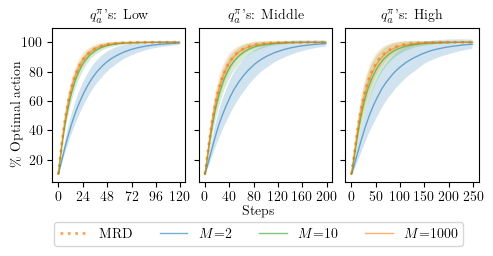

In [42]:
population_size = 1000
nei_sizes = [2, 10, 1000]
seeds = 1000
fontsize = 10
disjoint_neighbourhood = False
use_neighbourhood = True
device = "cpu"
n_proc = 20
names = ["near zero", "evenly spaced", "near one"]
names_dict = {
    names[0]: "Low",
    names[1]: "Middle",
    names[2]: "High",
}
# population_dict = {
#     population_sizes[0]: "Small",
#     population_sizes[1]: "Large",
# }
steps_dict = {names[0]: 120, names[1]: 200, names[2]: 250}


# plot stuff
plt.rcParams.update({"font.size": fontsize})
colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e"]

fig = plt.figure(figsize=(5.5, 2))  # or use tight_layout() later
outer = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)
fig.text(
    0.06,
    0.45,
    r"$\%$ Optimal action",
    horizontalalignment="center",
    verticalalignment="center",
    rotation="vertical",
    fontsize=fontsize,
)
fig.text(
    0.5,
    -0.04,
    "Steps",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)


axs = []
for i, name in enumerate(names):
    step = steps_dict[name]
    steps_increment = int(step / 5)
    if i == 0:
        ax0 = fig.add_subplot(outer[0])

        ax0.set_yticks(np.arange(20, 120, 20))
        ax0.set_yticklabels([f"{i:.0f}" for i in np.arange(20, 120, 20)])
        ax0.set_ylim(5, 110)

        ax0.set_xticks(np.arange(0, step + steps_increment, steps_increment))
        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, step + steps_increment, steps_increment)]
        )

    else:
        ax0 = fig.add_subplot(outer[i], sharey=axs[0])
        ax0.set_xticks(np.arange(0, step + steps_increment, steps_increment))
        ax0.set_xticklabels(
            [f"{i:.0f}" for i in np.arange(0, step + steps_increment, steps_increment)]
        )
        ax0.tick_params(labelleft=False)


    ax0.set_title(r"$q^{{\pi}}_a$'s: " + f"{names_dict[names[i]]}", fontsize=fontsize)
    axs.append(ax0)


for i, ax in enumerate(axs):
    
    name = names[i]
    step = steps_dict[name]
    bandit = BanditLinear(name=name)
    
    mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
        delta=1, bandit=bandit, steps=step, trd=False
    )
    
    ax.plot(
            range(step),
            optimal_action_mrd * 100,
            label=r"MRD",
            color=colors[2],
            linestyle="dotted",
            linewidth=2,
            alpha=0.7,
    )
    
    for j, nei_size in enumerate(nei_sizes):
        
        _, optimal_action_wvr = run_parallel_simulation_wvr(
        steps=step,
        population_size=population_size,
        seeds=seeds,
        neighbourhood_size=nei_size,
        disjoint_neighbourhood=disjoint_neighbourhood,
        use_neighbourhood=use_neighbourhood,
        name=name,
        n_proc=n_proc,
        device=device,
        )

        ax.plot(
            range(step),
            optimal_action_wvr.mean(axis=0) * 100,
            label=r"$M$"+f"={nei_size}",
            color=colors[j],
            linewidth=1,
            alpha=0.6,
        )

        ax.fill_between(
            range(step),
            optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
            optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
            facecolor=colors[j],
            alpha=0.2,
        )


lines_labels = [axs[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))

fig.legend(
    unique.values(),
    unique.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.06),
    ncol=4,
    fontsize=fontsize,
)


plt.savefig(f"nei_experiments.pdf", bbox_inches="tight", dpi=900)

# Debug

In [ ]:
bandit = BanditLinear(name="near one")
step = 100
seeds = 10
population_size = 2000000


mean_rewards_trd, optimal_action_trd = replicator_dynamic(
    delta=1, bandit=bandit, steps=step, trd=True
)

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=step, trd=False
)

mean_rewards_is, optimal_action_is = imitaton_of_success(
    steps=step, population_size=population_size, seeds=seeds, bandit=bandit
)

mean_rewards_wvr, optimal_action_wvr = weighted_voter_rule(
    steps=step, population_size=population_size, seeds=seeds, bandit=bandit
)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(
    range(step),
    optimal_action_trd * 100,
    label="TRD",
    color=colors[0],
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(step),
    optimal_action_mrd * 100,
    label="MRD",
    color=colors[2],
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(step),
    optimal_action_is.mean(axis=0) * 100,
    label=r"$R_{\text{success}}$ for $\mathcal{P}$: " + f"{population_size}",
    linewidth=1,
    alpha=0.6,
)

ax.fill_between(
    range(step),
    optimal_action_is.mean(axis=0) * 100 - optimal_action_is.std(axis=0) * 100,
    optimal_action_is.mean(axis=0) * 100 + optimal_action_is.std(axis=0) * 100,
    alpha=0.2,
)

ax.plot(
    range(step),
    optimal_action_wvr.mean(axis=0) * 100,
    label=r"$R_{\text{wvoter}}$ for $\mathcal{P}$: " + f"{population_size}",
    linewidth=1,
    alpha=0.6,
)

ax.fill_between(
    range(step),
    optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
    optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
    alpha=0.2,
)

plt.legend()
plt.show()

In [ ]:
bandit = BanditLinear(name="near one")

step = 300
seeds = 100


mean_rewards_wvr, optimal_action_wvr_10 = weighted_voter_rule(
    steps=step, population_size=1000, seeds=seeds, bandit=bandit, neighbourhood_size=10
)

mean_rewards_wvr, optimal_action_wvr_1 = weighted_voter_rule(
    steps=step, population_size=1000, seeds=seeds, bandit=bandit, neighbourhood_size=1
)


mean_rewards_wvr, optimal_action_wvr_1000 = weighted_voter_rule(
    steps=step,
    population_size=1000,
    seeds=seeds,
    bandit=bandit,
    neighbourhood_size=1000,
)

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=step, trd=False
)


fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)


ax.plot(
    range(step),
    optimal_action_mrd * 100,
    label="TRD",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(step),
    optimal_action_wvr_10.mean(axis=0) * 100,
    label="wvr_10",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(step),
    optimal_action_wvr_1000.mean(axis=0) * 100,
    label="wvr_100",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(step),
    optimal_action_wvr_1.mean(axis=0) * 100,
    label="wvr_2",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.fill_between(
    range(step),
    optimal_action_wvr_1.mean(axis=0) * 100 - optimal_action_wvr_1.std(axis=0) * 100,
    optimal_action_wvr_1.mean(axis=0) * 100 + optimal_action_wvr_1.std(axis=0) * 100,
    alpha=0.2,
)



ax.fill_between(
    range(step),
    optimal_action_wvr_1000.mean(axis=0) * 100
    - optimal_action_wvr_1000.std(axis=0) * 100,
    optimal_action_wvr_1000.mean(axis=0) * 100
    + optimal_action_wvr_1000.std(axis=0) * 100,
    alpha=0.2,
)

plt.legend()

In [2]:
bandit = BanditLinear(name="near one", device="cpu")

step = 250
seeds = 10
population_size = 1000
neighbourhood_size = 1000
name = "near one"

_, optimal_action_wvr_10 = weighted_voter_rule(
    steps=step,
    population_size=population_size,
    seeds=seeds,
    neighbourhood_size=neighbourhood_size,
    name=name,
    disjoint_neighbourhood=False,
    device="cpu",
)

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=step, trd=False
)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(
    range(step),
    optimal_action_wvr_10.mean(axis=0) * 100,
    label="wvr_10",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(step),
    optimal_action_mrd * 100,
    label="MRD",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.fill_between(
    range(step),
    optimal_action_wvr_10.mean(axis=0) * 100 - optimal_action_wvr_10.std(axis=0) * 100,
    optimal_action_wvr_10.mean(axis=0) * 100 + optimal_action_wvr_10.std(axis=0) * 100,
    alpha=0.2,
)

# plt.legend()

TypeError: weighted_voter_rule() missing 1 required positional argument: 'use_neighbourhood'

In [ ]:
import torch
from time import perf_counter

weights = torch.ones((500, 499))

quality_matrix = torch.zeros((500, 10), dtype=torch.float32)

In [21]:
for _ in range(100):
    _ = torch.multinomial(weights, num_samples=499, replacement=False)
    _ = torch.distributions.Categorical(weights).sample()

start = perf_counter()
idx = torch.multinomial(weights, num_samples=499, replacement=False)
pop_opinions = torch.distributions.Categorical(weights).sample()
end = perf_counter()
print(f"Time taken: {end - start:.4f} seconds")

Time taken: 0.0139 seconds


In [22]:
0.0139 * 100 * 10

13.899999999999999

In [ ]:
start = time.time()

end = time.time()
print(f"Time taken: {end - start:.4f} seconds")

Time taken: 0.0223 seconds


In [3]:
import os
import torch
import multiprocessing as mp
from functools import partial

torch.set_num_threads(1)

os.environ["OMP_NUM_THREADS"] = "1"  # OpenMP threads
os.environ["OPENBLAS_NUM_THREADS"] = "1"  # OpenBLAS (used by NumPy)
os.environ["MKL_NUM_THREADS"] = "1"  # MKL (used by NumPy on Intel)
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"  # macOS Accelerate
os.environ["NUMEXPR_NUM_THREADS"] = "1"  # numexpr if used

In [4]:
step = 5
seeds = 1
population_size = 10
neighbourhood_size = 10
disjoint_neighbourhood = False
device = "cpu"
bandit = BanditLinear(name="near one", device="cpu")


def wrapper(_):
    return weighted_voter_rule(
        steps=step,
        population_size=population_size,
        seeds=seeds,
        name="near one",
        neighbourhood_size=neighbourhood_size,
        disjoint_neighbourhood=disjoint_neighbourhood,
        device=device,
    )


with mp.Pool(processes=mp.cpu_count()) as pool:
    results = pool.map(wrapper, [None] * 16)

# print(results.shape)
print(results)

[(array([[0.77150506, 0.7652383 , 0.8140901 , 0.8005246 , 0.79672706]],
      dtype=float32), array([[0.1, 0.2, 0.2, 0.3, 0.1]], dtype=float32)), (array([[0.73499364, 0.8200286 , 0.8352903 , 0.8322447 , 0.7767674 ]],
      dtype=float32), array([[0.1, 0.2, 0.1, 0.1, 0.1]], dtype=float32)), (array([[0.7324521 , 0.7166685 , 0.77943784, 0.77336675, 0.7677601 ]],
      dtype=float32), array([[0.1, 0. , 0. , 0. , 0. ]], dtype=float32)), (array([[0.75070035, 0.71660376, 0.7213421 , 0.7643202 , 0.8067719 ]],
      dtype=float32), array([[0.1, 0.1, 0. , 0. , 0. ]], dtype=float32)), (array([[0.74488765, 0.71227944, 0.6839429 , 0.67299974, 0.7005462 ]],
      dtype=float32), array([[0.1, 0. , 0. , 0. , 0. ]], dtype=float32)), (array([[0.7506032 , 0.81005144, 0.7937584 , 0.842573  , 0.8653556 ]],
      dtype=float32), array([[0.1, 0.1, 0.1, 0.3, 0.4]], dtype=float32)), (array([[0.7904335, 0.7502493, 0.8044206, 0.8728902, 0.8487588]],
      dtype=float32), array([[0.1, 0.2, 0.5, 0.6, 0.7]], dtype=

seed 2306606809seed 2306606731seed 2306606668seed 2306606575seed 2306606872seed 2306606595seed 2306606964seed 2306607026seed 2306607162seed 2306607218











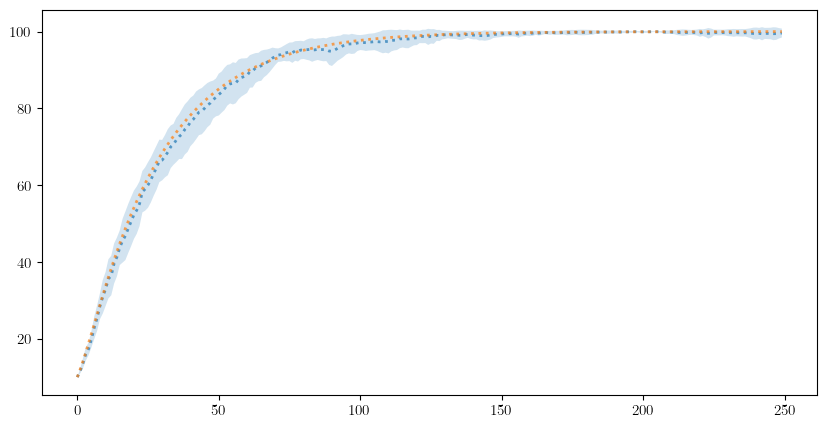

In [2]:
steps = 250
seeds = 10
population_size = 1000
neighbourhood_size = 10
disjoint_neighbourhood = False
n_proc = 10
device = "cpu"
bandit = BanditLinear(name="near one", device="cpu")

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=False
)

_, optimal_action_wvr_10 = run_parallel_simulation_wvr(
    steps=steps,
    population_size=population_size,
    seeds=seeds,
    name="near one",
    neighbourhood_size=neighbourhood_size,
    disjoint_neighbourhood=disjoint_neighbourhood,
    use_neighbourhood=True,
    n_proc=n_proc,
    device=device,
)

# print(optimal_action_wvr_10)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(
    range(steps),
    optimal_action_wvr_10.mean(axis=0) * 100,
    label="wvr_10",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(steps),
    optimal_action_mrd * 100,
    label="MRD",
    linestyle="dotted",
    linewidth=2,
    alpha=0.7,
)

ax.fill_between(
    range(steps),
    optimal_action_wvr_10.mean(axis=0) * 100 - optimal_action_wvr_10.std(axis=0) * 100,
    optimal_action_wvr_10.mean(axis=0) * 100 + optimal_action_wvr_10.std(axis=0) * 100,
    alpha=0.2,
)